In [ ]:
! pip install pyAudioAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=e6d0d4634dcd69b79651a4c290eb9c0f5e0b90fc98c807bc9b8cf04f68f6e417
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
# https://github.com/retkowsky/Audio_Analytics_With_AzureML
# https://github.com/retkowsky/Audio_Analytics_With_AzureML/blob/main/08.%20Sounds%20Classification%20with%20pyAudioAnalysis.ipynb


In [ ]:
!pip install eyed3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
#!pip install pyAudioAnalysis
#!pip install eyed3
#!pip install hmmlearn

In [ ]:
! pip install pydub

In [ ]:
# https://pypi.org/project/car-sound-dataset/
! pip install car-sound-dataset


In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly
import IPython
import pandas as pd
import numpy as np

from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis.audioTrainTest import extract_features_and_train

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
ls

drive/  sample_data/


In [ ]:
import os
os.chdir('/content/drive/My Drive/MOTOR_SOUNDS')

In [ ]:
pwd

'/content/drive/My Drive/MOTOR_SOUNDS'

In [ ]:
# extract short-term features using a 50msec non-overlapping windows
mt, st = 0.05, 0.05

dirs = ["dev_data_fan/fan", "dev_data_gearbox/gearbox", "dev_data_pump/pump", "dev_data_valve/valve"]

extract_features_and_train(dirs, mt, mt, st, st, "svm_rbf",
                           "motorsoundsmodel")

Analyzing file 1 of 50: dev_data_fan/fan/section_00_source_train_normal_0000_strength_1_ambient.wav
Analyzing file 2 of 50: dev_data_fan/fan/section_00_source_train_normal_0001_strength_1_ambient.wav
Analyzing file 3 of 50: dev_data_fan/fan/section_00_source_train_normal_0002_strength_1_ambient.wav
Analyzing file 4 of 50: dev_data_fan/fan/section_00_source_train_normal_0003_strength_1_ambient.wav
Analyzing file 5 of 50: dev_data_fan/fan/section_00_source_train_normal_0004_strength_1_ambient.wav
Analyzing file 6 of 50: dev_data_fan/fan/section_00_source_train_normal_0005_strength_1_ambient.wav
Analyzing file 7 of 50: dev_data_fan/fan/section_00_source_train_normal_0006_strength_1_ambient.wav
Analyzing file 8 of 50: dev_data_fan/fan/section_00_source_train_normal_0007_strength_1_ambient.wav
Analyzing file 9 of 50: dev_data_fan/fan/section_00_source_train_normal_0008_strength_1_ambient.wav
Analyzing file 10 of 50: dev_data_fan/fan/section_00_source_train_normal_0009_strength_1_ambient.wav

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT


cm, thr_prre, pre, rec, thr_roc, fpr, tpr = aT.evaluate_model_for_folders(
    ["dev_data_fan/fan", "dev_data_gearbox/gearbox", "dev_data_pump/pump", "dev_data_valve/valve"], "motorsoundsmodel",
    "svm_rbf", "fan")

[[49  0  1  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]
[0.98, 1.0, 1.0, 1.0] [1.0, 1.0, 0.9803921568627451, 1.0] [0.98989898989899, 1.0, 0.99009900990099, 1.0] 0.994999499949995 0.995


In [ ]:
confmatrix = pd.DataFrame(cm, columns=['c1_fan', 'c2_gearbox','c3_pump','c4_valve'])
confmatrix

,c1_fan,c2_gearbox,c3_pump,c4_valve
0,49,0,1,0
1,0,50,0,0
2,0,0,50,0
3,0,0,0,50


In [ ]:
TP = confmatrix.iloc[0, 0]
FN = confmatrix.iloc[0, 1]
FP = confmatrix.iloc[1, 0]
TN = confmatrix.iloc[1, 1]

accuracy = (TP + TN) / (TP + TN + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1score = 2 * (recall * precision) / (recall + precision)

print("Accuracy =", round(accuracy, 4))
print("Precision =", round(precision, 4))
print("Recall =", round(recall, 4))
print("F1score =", round(f1score, 4))

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1score = 1.0


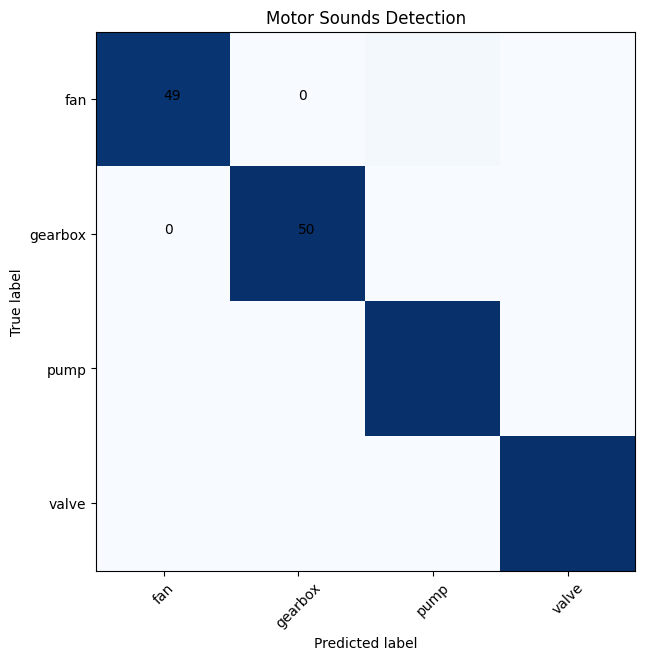

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

classNames = ['fan', 'gearbox','pump','valve']
plt.title('Motor Sounds Detection')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['TP', 'FN'], ['FP', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()


In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_fan/fan/source_test/section_00_source_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

Analysing /content/drive/My Drive/MOTOR_SOUNDS/dev_data_fan/fan/source_test/section_00_source_test_anomaly_0000.wav

Predicted Class: GEARBOX
Confidence = 0.4229


In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_fan/fan/target_test/section_00_target_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_gearbox/gearbox/source_test/section_00_source_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_gearbox/gearbox/target_test/section_00_target_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_pump/pump/source_test/section_00_source_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

Analysing /content/drive/My Drive/MOTOR_SOUNDS/dev_data_pump/pump/source_test/section_00_source_test_anomaly_0000.wav

Predicted Class: GEARBOX
Confidence = 0.41993


In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_pump/pump/target_test/section_00_target_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

Analysing /content/drive/My Drive/MOTOR_SOUNDS/dev_data_pump/pump/target_test/section_00_target_test_anomaly_0000.wav

Predicted Class: GEARBOX
Confidence = 0.64524


In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_valve/valve/source_test/section_00_source_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

In [ ]:
files_to_test = ["/content/drive/My Drive/MOTOR_SOUNDS/dev_data_valve/valve/target_test/section_00_target_test_anomaly_0000.wav"] # fan

for f in files_to_test:
    print('Analysing ' f'{f}')
    c, p, p_nam = aT.file_classification(f, "motorsoundsmodel",
                                         "gradientboosting")
    n = np.array(p)
    maxindex = np.argmax(n)
    predictedclass = p_nam[maxindex]
    confidence = max(p)
    print("\n\033[1;31;34mPredicted Class:", str.upper(predictedclass))
    print("Confidence =", round(confidence, 5))

Analysing /content/drive/My Drive/MOTOR_SOUNDS/dev_data_valve/valve/target_test/section_00_target_test_anomaly_0000.wav

Predicted Class: VALVE
Confidence = 0.92709
